# Реализация алгоритма обучения персептрона

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
class Perceptron(object):
    """ Классификатор на основе персептрона.
    Параметры
    ---------
    eta : float
       Скорость обучения (между 0.0 и 1.0)
    n_iter : int
       Проходы по обучающему набору данных.
    random_state : int
       Начальное значение генератора случайных чисел
       для инициализации случайными весами.
    Атрибуты
    --------
    w_ : одномерный массив
       Веса после подгонки.
    error_ : список
       Количество непавильных классификаций (обновлений) в каждой эпохе.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Подгоняет к обучающим данным.
        Параметры
        ---------
        Х : {подобен массиву}, форма = [n_examples, n_features]
           Обучающие векторы, где n_examples - количество образцов
           иn_features - количество признаков.
        y : подобен массиву, форма = [n_examples]
           Целевые значения.
        Возвращает
        ----------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

In [2]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machimne-learning-databases',
                 'iris', 'iris.data')
print('URL: ', s)

URL:  https://archive.ics.uci.edu\ml\machimne-learning-databases\iris\iris.data


In [3]:
df = pd.read_csv('iris.data', header=None,
                 encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


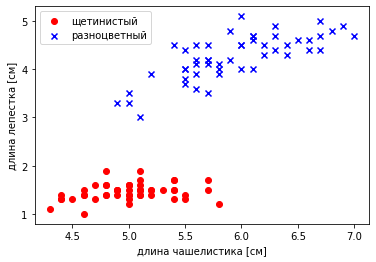

In [4]:
# выбрать ирис щетинистый и ирис разноцветный
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# извечь длуну чашелистика и длину лепестка
X = df.iloc[0:100, [0, 2]].values
# вычертить график для данных
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='разноцветный')
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

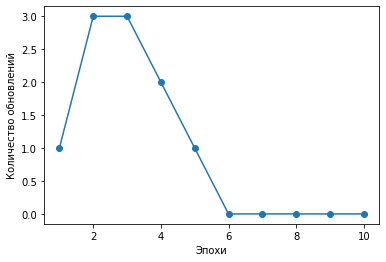

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel("Эпохи")
plt.ylabel("Количество обновлений")
plt.show()

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # настроить генератор маркеров и екарту цветов
    markers = ('s', 'x', 'o', '4', '4')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывести поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

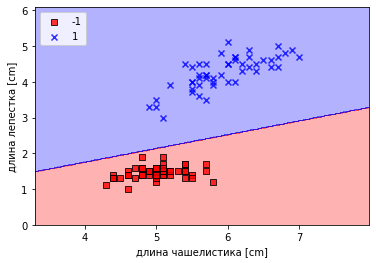

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("длина чашелистика [cm]")
plt.ylabel("длина лепестка [cm]")
plt.legend(loc="upper left")
plt.show()

# Адаптивные линейные нейроны и сходимость обучения

In [8]:
class AdalineGD(object):
    """ Классификатор на основе адаптивного линейного нейрона.
    Параметры
    ---------
    eta : float
       Скорость обучения (между 0.0 и 1.0)
    n-iter : int
       Проходы по обучающему набору данных.
    random_state : int
       Начальное значение генератора случайных чисел
       для инициализации случайными весами
    Атрибуты
    --------
    w_ : одномерный массив
       Веса после подгонки
    cost_ : список
       Значение функции издержек на основе суммы квадратов
       в каждой эпохе.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгоняет к обучающим данным.
        Параметры
        ---------
        Х : {подобен массиву}, форма = [n_examples, n_features]
            Обучающие векторыб где n_examples - количество образцов,
            n_features - количество признаков.
        у : подобен массиву, форма = [n_examples]
            Целевые значения.
        Возвращает
        ----------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+ X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Вычисляет линейную активацию"""
        return X
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.activation(self.net_input(X))
                       >= 0.0, 1, -1)

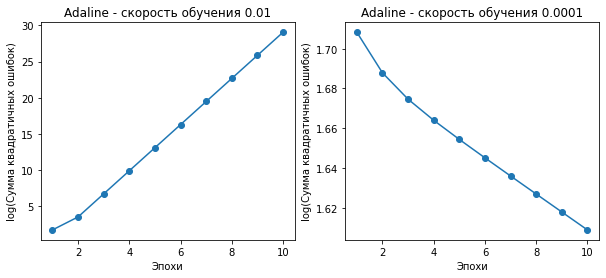

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), 
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Эпохи")
ax[0].set_ylabel("log(Сумма квадратичных ошибок)")
ax[0].set_title("Adaline - скорость обучения 0.01")
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), 
          np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel("Эпохи")
ax[1].set_ylabel("log(Сумма квадратичных ошибок)")
ax[1].set_title("Adaline - скорость обучения 0.0001")
plt.show()

### Улучшение градиентного спуска посредством масштабирования прикнаков

In [10]:
# применяем масштабирование методом стандартизации (нулевое среднее и стандартное отклонение равное 1)
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

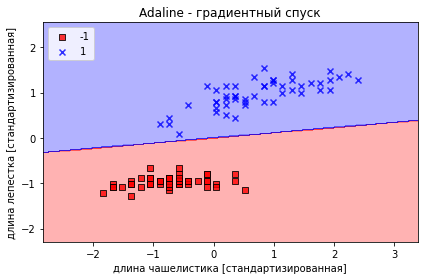

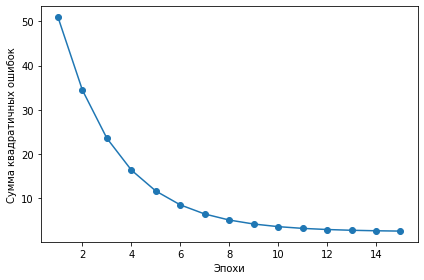

In [11]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - градиентный спуск")
plt.xlabel("длина чашелистика [стандартизированная]")
plt.ylabel("длина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1),
        ada_gd.cost_, marker='o')
plt.xlabel("Эпохи")
plt.ylabel("Сумма квадратичных ошибок")
plt.tight_layout()
plt.show()

### Крупно масштабное обучение и стохастический градиентный спуск

In [12]:
class AdalineSGD(object):
    """ Классификатор на основе адаптивного линейного нейрона.
    Параметры
    ---------
    eta : float
       Скорость обучения (между 0.0 и 1.0)
    n-iter : int
       Проходы по обучающему набору данных.
    random_state : int
       Начальное значение генератора случайных чисел
       для инициализации случайными весами
    Атрибуты
    --------
    w_ : одномерный массив
       Веса после подгонки
    cost_ : список
       Значение функции издержек на основе суммы квадратов
       в каждой эпохе.
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгоняет к обучающим данным.
        Параметры
        ---------
        Х : {подобен массиву}, форма = [n_examples, n_features]
            Обучающие векторыб где n_examples - количество образцов,
            n_features - количество признаков.
        у : подобен массиву, форма = [n_examples]
            Целевые значения.
        Возвращает
        ----------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partical_fit(self, X, y):
        """Подгоняет к обучающим данным без повторной инициализации весов"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Тасует обучающие данные"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Инициализирует веса небольшим случайными числами"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Применяет правило обучения Adaline для обновления весов"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Вычисляет линейную активацию"""
        return X
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.activation(self.net_input(X))
                       >= 0.0, 1, -1)

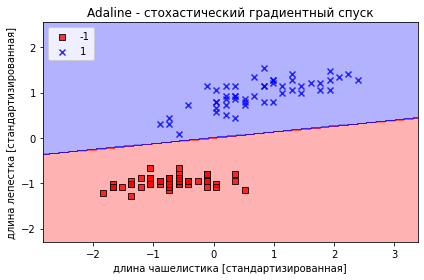

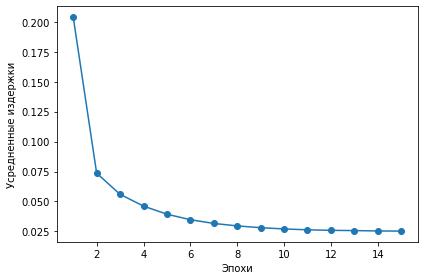

In [13]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - стохастический градиентный спуск")
plt.xlabel("длина чашелистика [стандартизированная]")
plt.ylabel("длина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1),
         ada_sgd.cost_, marker='o')
plt.xlabel("Эпохи")
plt.ylabel("Усредненные издержки")
plt.tight_layout()
plt.show()

# Обзор классификаторов на основе машинного обучения с использованием scikit-learn

## Выбор алгоритма классификации

In [14]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("Метки классов:", np.unique(y))

Метки классов: [0 1 2]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)

In [16]:
print("Количества меток в у:", np.bincount(y))
print("Количества меток в у_train:", np.bincount(y_train))
print("Количества меток в у_test:", np.bincount(y_test))

Количества меток в у: [50 50 50]
Количества меток в у_train: [35 35 35]
Количества меток в у_test: [15 15 15]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
y_pred = ppn.predict(X_test_std)
print("Неправильно классифицированных образцов: {}".format(
       (y_test != y_pred).sum()))

Неправильно классифицированных образцов: 1


In [20]:
from sklearn.metrics import accuracy_score
print("Правильность: %.3f" % accuracy_score(y_test, y_pred))

Правильность: 0.978


In [21]:
print("Правильность: %.3f" % ppn.score(X_test_std, y_test))

Правильность: 0.978


In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # настроить генератор маркеров и екарту цветов
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывести поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    # выделить образцы из испытательного набора
    if test_idx:
        # вычертиь все образцы
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='испытательный набор')

C:\Users\Denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


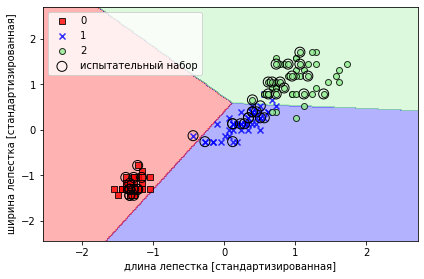

In [23]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel("длина лепестка [стандартизированная]")
plt.ylabel("ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Моделирование вероятностей классов посредством логистической регрессии

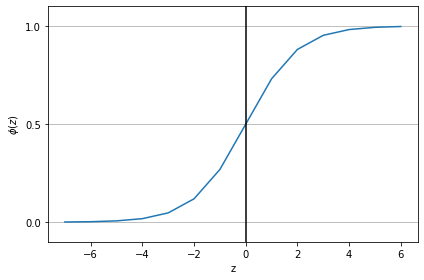

In [24]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 1.0)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# отметки и линия координатной сетки оси у
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

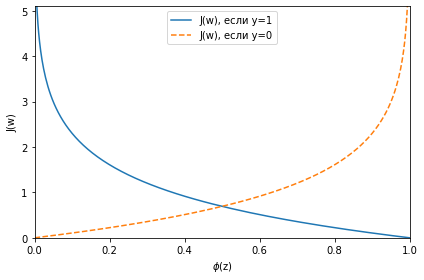

In [25]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1-sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w), если y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w), если y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel("J(w)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
class LogisticRegressionGD(object):
    """ Классификатор на основе логистической регрессии,
        использующий градиентный спуск.
        
    Параметры
    ---------
    eta : float
       Скорость обучения (между 0.0 и 1.0)
    n-iter : int
       Проходы по обучающему набору данных.
    random_state : int
       Начальное значение генератора случайных чисел
       для инициализации случайными весами
    Атрибуты
    --------
    w_ : одномерный массив
       Веса после подгонки
    cost_ : список
       Значение функции издержек на основе суммы квадратов
       в каждой эпохе.
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгоняет к обучающим данным.
        Параметры
        ---------
        Х : {подобен массиву}, форма = [n_examples, n_features]
            Обучающие векторыб где n_examples - количество образцов,
            n_features - количество признаков.
        у : подобен массиву, форма = [n_examples]
            Целевые значения.
        Возвращает
        ----------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # обратите внимание, что теперь мы вычисляем
            # логистические 'издержки', а не издержки в виде
            # суммы квадратичных ошибок
            cost = (-y.dot(np.log(output)) -
                    ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, z):
        """Вычисляет логистическую сигмоидальную активацию"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

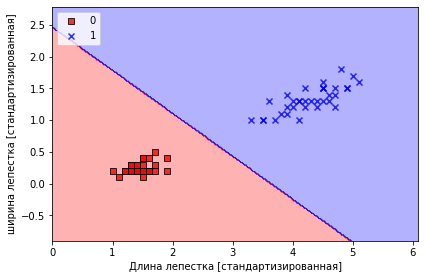

In [27]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel("Длина лепестка [стандартизированная]")
plt.ylabel("ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


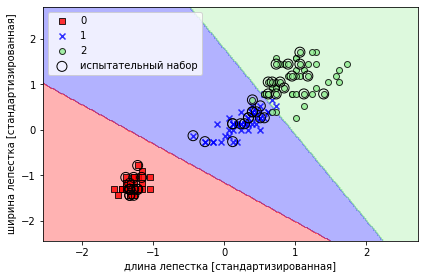

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1,
                        solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel("длина лепестка [стандартизированная]")
plt.ylabel("ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [30]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [31]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

### Решение проблемы переобучения с помощью регуляризации

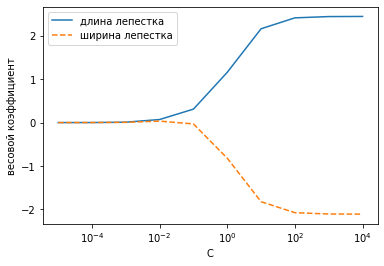

In [32]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr=LogisticRegression(C=10.**c, random_state=1,
                         solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
        label="длина лепестка")
plt.plot(params, weights[:, 1], linestyle='--',
        label="ширина лепестка")
plt.ylabel("весовой коэффициент")
plt.xlabel('C')
plt.legend(loc="upper left")
plt.xscale('log')
plt.show()

## Классификация с максимальным зазором с помощью методов опорных векторов

C:\Users\Denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


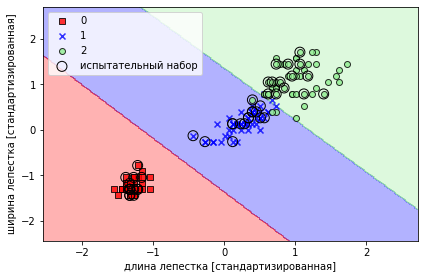

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel("длина лепестка [стандартизированная]")
plt.ylabel("ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Решение нелинейных задач с применением ядерного метода опорных векторов

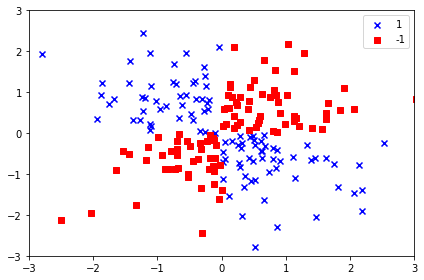

In [35]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

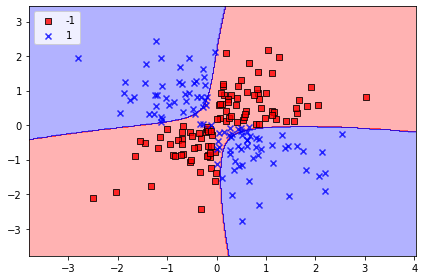

In [36]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor,classifier=svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\Denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


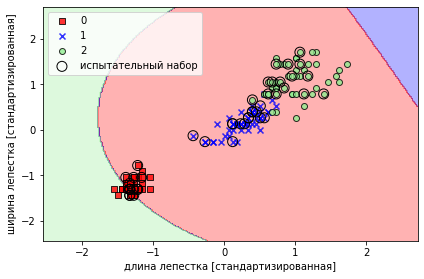

In [44]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel("длина лепестка [стандартизированная]")
plt.ylabel("ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Обучение моделей на основе деревьев принятия решений